# Описание задачи

По приведенным признакам предсказать возраст человека.


# Чтение данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from google.colab import drive


drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Machine Learning/human_age_prediction.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
entities, features = df.shape
print(f"Entities: {entities}")
print(f"Features: {features}")
print("\n\n")

df.info()

Entities: 3000
Features: 26



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   

Категориальные признаки: Physical Activity Level,, Smoking Status, Alcohol Consumption, Diet, Chronic Diseases, Medication Use, Family History, Mental Health Status, Education Level, Income Level, Gender, Sleep Patterns

Количественные признаки:
Height
, Weight
, Blood Pressure
, Bone Density
, Vision Sharpness
, Hearing Ability
, Cognitive function
, Stress Levels
, Pollution Exposure
, Sun Exposure
, Age

In [ ]:
df

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,134/91,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,...,Diabetes,57.820282,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22
2996,Male,163.443512,93.217007,110/78,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,...,Heart Disease,68.783715,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19
2997,Male,177.857644,86.258847,159/116,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,...,NaN,50.133807,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85
2998,Female,162.287164,41.371018,134/82,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,...,Hypertension,68.864629,Good,Insomnia,7.920076,4.452130,5.051613,NaN,High,30


In [ ]:
df.describe()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


In [ ]:
df['Physical Activity Level'] = df['Physical Activity Level'].astype('category')
df['Smoking Status'] = df['Smoking Status'].astype('category')
df['Alcohol Consumption'] = df['Alcohol Consumption'].astype('category')
df['Diet'] = df['Diet'].astype('category')

df.describe(include=['category'])

,Physical Activity Level,Smoking Status,Alcohol Consumption,Diet
count,3000,3000,1799,3000
unique,3,3,2,4
top,Moderate,Former,Occasional,Balanced
freq,1407,1181,1057,1183


In [ ]:
df.isnull().sum()

,0
Gender,0
Height (cm),0
Weight (kg),0
Blood Pressure (s/d),0
Cholesterol Level (mg/dL),0
BMI,0
Blood Glucose Level (mg/dL),0
Bone Density (g/cm²),0
Vision Sharpness,0
Hearing Ability (dB),0


Присутствуют пропущенные значения


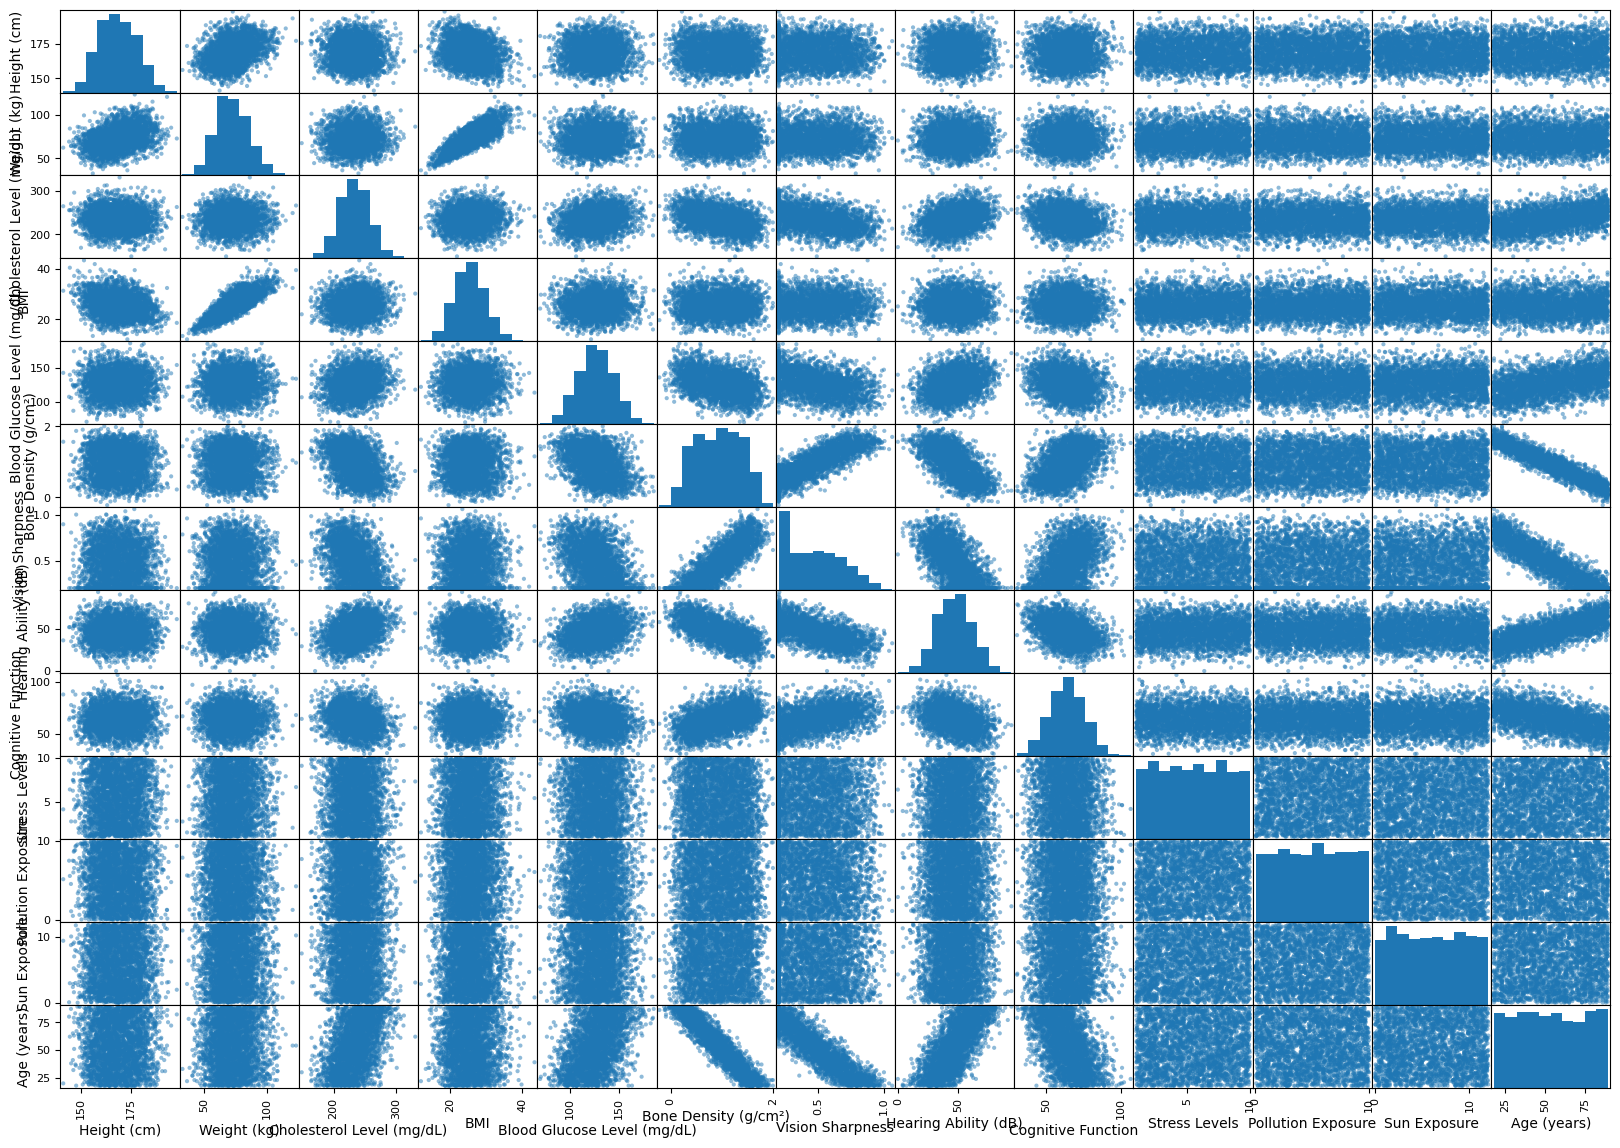

In [ ]:
pd.plotting.scatter_matrix(df, figsize = (20, 14))
pass

In [ ]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
Height (cm),1.000000,0.398371,-0.027233,-0.222789,0.011990,-0.023558,-0.009272,0.009461,0.018231,-0.006537,-0.028681,0.001900,0.020322
Weight (kg),0.398371,1.000000,0.041859,0.800150,0.015960,-0.008140,0.000436,0.008944,0.006220,0.016620,-0.029717,-0.013118,0.002521
Cholesterol Level (mg/dL),-0.027233,0.041859,1.000000,0.065532,0.189589,-0.401220,-0.382170,0.328465,-0.230204,0.001813,0.001632,0.009417,0.432368
BMI,-0.222789,0.800150,0.065532,1.000000,0.012700,0.003840,0.003684,0.005878,-0.006549,0.021403,-0.009308,-0.014736,-0.008042
Blood Glucose Level (mg/dL),0.011990,0.015960,0.189589,0.012700,1.000000,-0.393006,-0.396912,0.311569,-0.209052,-0.021140,-0.004916,0.021439,0.428573
Bone Density (g/cm²),-0.023558,-0.008140,-0.401220,0.003840,-0.393006,1.000000,0.846140,-0.667803,0.475936,-0.033976,0.013555,-0.003921,-0.937712
Vision Sharpness,-0.009272,0.000436,-0.382170,0.003684,-0.396912,0.846140,1.000000,-0.639199,0.466071,-0.023664,0.003519,-0.011532,-0.899692
Hearing Ability (dB),0.009461,0.008944,0.328465,0.005878,0.311569,-0.667803,-0.639199,1.000000,-0.384928,0.027843,-0.013024,0.019801,0.712374
Cognitive Function,0.018231,0.006220,-0.230204,-0.006549,-0.209052,0.475936,0.466071,-0.384928,1.000000,-0.040382,-0.011985,-0.004089,-0.508058
Stress Levels,-0.006537,0.016620,0.001813,0.021403,-0.021140,-0.033976,-0.023664,0.027843,-0.040382,1.000000,0.025995,0.020434,0.029093


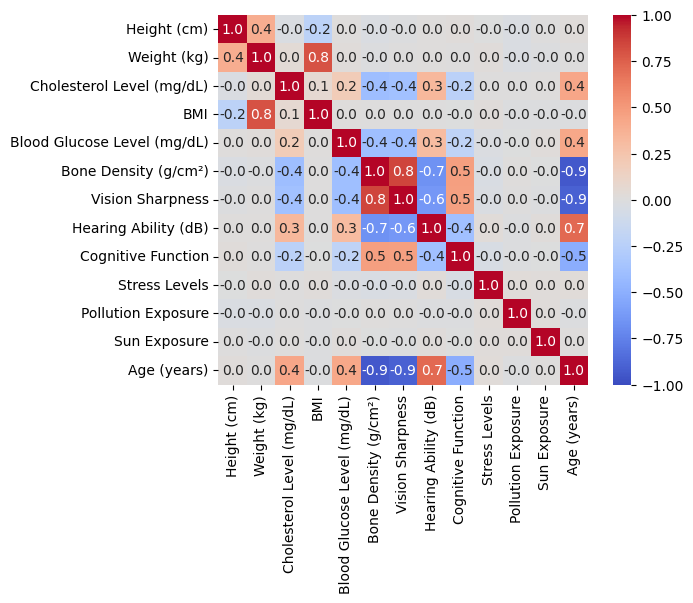

In [ ]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm')
pass

In [ ]:
from sklearn.model_selection import train_test_split

rows_to_drop = df[
    (df['Age (years)'] < df['Age (years)'].quantile(0.02)) |
    (df['Age (years)'] > df['Age (years)'].quantile(0.98))].index

print(f"Entitites before drop: {df.shape[0]}")
data = df.drop(rows_to_drop)
print(f"Entitites after drop: {data.shape[0]}")

Entitites before drop: 3000
Entitites after drop: 2904


In [ ]:
from sklearn.impute import SimpleImputer

# Если есть пропущенные категориальные признаки
missed_features = ['Alcohol Consumption', 'Chronic Diseases',
                     'Medication Use', 'Family History', 'Education Level']

imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(data[missed_features])
data[missed_features] = imp_cat.transform(data[missed_features])

In [ ]:
data.isnull().sum()

,0
Gender,0
Height (cm),0
Weight (kg),0
Blood Pressure (s/d),0
Cholesterol Level (mg/dL),0
BMI,0
Blood Glucose Level (mg/dL),0
Bone Density (g/cm²),0
Vision Sharpness,0
Hearing Ability (dB),0


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

categorical_features = ['Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
                        'Diet', 'Chronic Diseases', 'Medication Use', 'Family History',
                        'Mental Health Status', 'Education Level', 'Income Level',
                        'Gender', 'Sleep Patterns']

# enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc = OrdinalEncoder()
enc.fit(data[categorical_features])

dummies = pd.DataFrame(enc.transform(data[categorical_features]),
                       columns=categorical_features,
                       index=data.index)
dummies.head()

,Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Mental Health Status,Education Level,Income Level,Gender,Sleep Patterns
1,1.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
2,2.0,2.0,1.0,0.0,2.0,1.0,2.0,3.0,2.0,2.0,0.0,1.0
3,2.0,2.0,1.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0
4,1.0,1.0,0.0,3.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0
5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0


In [ ]:
data[['Blood Pressure s', 'Blood Pressure d']] = data['Blood Pressure (s/d)'].str.split('/', expand=True)

data = data.drop(categorical_features, axis=1)
data = pd.concat((data, dummies), axis = 1)
data['Blood Pressure s'] = pd.to_numeric(data['Blood Pressure s'])
data['Blood Pressure d'] = pd.to_numeric(data['Blood Pressure d'])
data = data.drop(columns=['Blood Pressure (s/d)'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2904 entries, 1 to 2999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Height (cm)                  2904 non-null   float64
 1   Weight (kg)                  2904 non-null   float64
 2   Cholesterol Level (mg/dL)    2904 non-null   float64
 3   BMI                          2904 non-null   float64
 4   Blood Glucose Level (mg/dL)  2904 non-null   float64
 5   Bone Density (g/cm²)         2904 non-null   float64
 6   Vision Sharpness             2904 non-null   float64
 7   Hearing Ability (dB)         2904 non-null   float64
 8   Cognitive Function           2904 non-null   float64
 9   Stress Levels                2904 non-null   float64
 10  Pollution Exposure           2904 non-null   float64
 11  Sun Exposure                 2904 non-null   float64
 12  Age (years)                  2904 non-null   int64  
 13  Blood Pressure s       

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = data.columns.difference(['Age (years)'])


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_to_normalize])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_normalize, index=data.index)
norm_data = pd.concat([scaled_df, data[['Age (years)']]], axis=1)

norm_data.describe()

,Alcohol Consumption,BMI,Blood Glucose Level (mg/dL),Blood Pressure d,Blood Pressure s,Bone Density (g/cm²),Cholesterol Level (mg/dL),Chronic Diseases,Cognitive Function,Diet,...,Mental Health Status,Physical Activity Level,Pollution Exposure,Sleep Patterns,Smoking Status,Stress Levels,Sun Exposure,Vision Sharpness,Weight (kg),Age (years)
count,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,...,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2.904000e+03,2904.000000
mean,-6.728624e-18,-9.811558e-16,1.614870e-16,3.755796e-16,1.174451e-16,-2.275498e-16,-9.982832e-16,-1.162217e-16,7.756269e-16,-2.691450e-17,...,3.303143e-17,-5.382900e-17,8.563704e-17,1.052112e-16,-8.502534e-17,1.908483e-16,-7.095640e-17,-7.829672e-17,-3.505002e-16,53.485193
std,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,...,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,19.885388
min,-1.743256e+00,-3.101771e+00,-3.128975e+00,-3.627631e+00,-3.110965e+00,-2.681685e+00,-3.491053e+00,-1.908209e+00,-2.860534e+00,-1.025149e+00,...,-1.647691e+00,-1.534986e+00,-1.748090e+00,-1.896754e+00,-1.379600e+00,-1.732795e+00,-1.711220e+00,-1.333331e+00,-3.035898e+00,19.000000
25%,5.736391e-01,-7.080662e-01,-6.663812e-01,-6.705818e-01,-6.980577e-01,-8.315626e-01,-7.068762e-01,-6.204007e-01,-6.979416e-01,-1.025149e+00,...,-5.714663e-01,-2.908890e-01,-8.473388e-01,-5.050982e-01,-1.379600e+00,-8.749308e-01,-8.876552e-01,-9.050743e-01,-7.091255e-01,37.000000
50%,5.736391e-01,-4.414573e-02,1.002820e-02,-5.877861e-02,4.154454e-04,1.585217e-02,1.350868e-02,6.674075e-01,1.116928e-02,-1.474861e-01,...,5.047582e-01,-2.908890e-01,2.830661e-02,8.865576e-01,-9.055287e-02,7.339747e-03,-5.102571e-03,-5.384726e-02,-7.962337e-02,53.000000
75%,5.736391e-01,6.496655e-01,6.924545e-01,6.549918e-01,6.988886e-01,8.131412e-01,6.714254e-01,6.674075e-01,6.926088e-01,7.301772e-01,...,5.047582e-01,9.532078e-01,8.531588e-01,8.865576e-01,1.198494e+00,8.547409e-01,8.753609e-01,7.772952e-01,6.962228e-01,71.000000
max,5.736391e-01,4.088192e+00,3.260094e+00,3.815975e+00,2.984801e+00,2.482743e+00,3.983287e+00,6.674075e-01,3.634613e+00,1.607841e+00,...,1.580983e+00,9.532078e-01,1.726830e+00,8.865576e-01,1.198494e+00,1.744581e+00,1.742996e+00,2.763281e+00,3.877746e+00,88.000000


In [ ]:
x = norm_data.drop(['Age (years)'], axis=1)
y = norm_data['Age (years)']

x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size = 0.3, random_state = 42)

N_train, _ = x_train.shape
N_test,  _ = x_test.shape

print(f"Размер тренировочной выборки: {N_train}",
      f"Размер тестовой выборки: {N_test}", sep='\n')

Размер тренировочной выборки: 2032
Размер тестовой выборки: 872


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred_linear = linear_model.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Линейная регрессия:")
print(f"Среднеквадратичная ошибка (MSE): {mse_linear}")
print(f"Средняя абсолютная ошибка (MAE): {mae_linear}")
print(f"Коэффициент детерминации (R²): {r2_linear}")

Линейная регрессия:
Среднеквадратичная ошибка (MSE): 26.820869568716986
Средняя абсолютная ошибка (MAE): 4.120412273069897
Коэффициент детерминации (R²): 0.9308745226649751


In [ ]:
linear_model_coefs = list(linear_model.coef_)
linear_feature_coef = {feat : coef for feat, coef in
                       zip(x_train.columns, linear_model_coefs)}

linear_feature_coef = dict(sorted(linear_feature_coef.items(),
                                  key=lambda item: abs(item[1]),
                                  reverse=True))
linear_feature_coef

{'Bone Density (g/cm²)': -9.848868688637465,
 'Vision Sharpness': -5.87597921981647,
 'BMI': -1.9265708694093844,
 'Hearing Ability (dB)': 1.8168579576997776,
 'Weight (kg)': 1.6850186714970947,
 'Blood Pressure s': 1.4371749625562276,
 'Blood Pressure d': 1.392122197043772,
 'Height (cm)': -1.032534641106818,
 'Cognitive Function': -0.9144393410487337,
 'Blood Glucose Level (mg/dL)': 0.760878979111307,
 'Cholesterol Level (mg/dL)': 0.7545935665342187,
 'Chronic Diseases': -0.29914848119205806,
 'Sun Exposure': -0.23919246245113857,
 'Sleep Patterns': -0.19185211515545497,
 'Income Level': 0.16113674531851838,
 'Gender': 0.14248075511946748,
 'Physical Activity Level': 0.13267868863984064,
 'Smoking Status': -0.12526326529504084,
 'Medication Use': -0.11825944485498205,
 'Stress Levels': -0.06738612328266702,
 'Mental Health Status': 0.048720750318126255,
 'Education Level': -0.037255817150162046,
 'Pollution Exposure': 0.03425608870455088,
 'Family History': 0.009680109854890845,
 'Di

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)


best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = -grid_search.best_score_

print(f"Лучший параметр n_neighbors: {best_n_neighbors}")
print(f"Среднеквадратичная ошибка (MSE) при лучшем n_neighbors: {best_score}")

Лучший параметр n_neighbors: 19
Среднеквадратичная ошибка (MSE) при лучшем n_neighbors: 57.76882707175954


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=19)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nk-ближайшие соседи:")
print(f"Среднеквадратичная ошибка (MSE): {mse_knn}")
print(f"Средняя абсолютная ошибка (MAE): {mae_knn}")
print(f"Коэффициент детерминации (R²): {r2_knn}")


k-ближайшие соседи:
Среднеквадратичная ошибка (MSE): 54.26504167831456
Средняя абсолютная ошибка (MAE): 6.03760260743602
Коэффициент детерминации (R²): 0.8601426065248206


# Вывод
Линейная регрессия демонстрирует лучшие результаты по сравнению с методом kNN. Это обусловлено довольно простой зависимостью между возрастом и такими показателями, как костная плотность или острота зрения и слуха. В то же время корреляция с большинством других параметров практически отсутствует, поэтому сходство точек в пространстве признаков слабо отражает похожесть двух людей по критически важным параметрам.

# Кластеризация

## Подготовка данных

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn


drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Machine Learning/human_age_prediction.csv'
df = pd.read_csv(file_path)

rows_to_drop = df[
    (df['Age (years)'] < df['Age (years)'].quantile(0.02)) |
    (df['Age (years)'] > df['Age (years)'].quantile(0.98))].index
data = df.drop(rows_to_drop)

missed_features = ['Alcohol Consumption', 'Chronic Diseases',
                     'Medication Use', 'Family History', 'Education Level']

imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(data[missed_features])
data[missed_features] = imp_cat.transform(data[missed_features])


categorical_features = ['Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
                        'Diet', 'Chronic Diseases', 'Medication Use', 'Family History',
                        'Mental Health Status', 'Education Level', 'Income Level',
                        'Gender', 'Sleep Patterns']
enc = OrdinalEncoder()
enc.fit(data[categorical_features])
dummies = pd.DataFrame(enc.transform(data[categorical_features]),
                       columns=categorical_features,
                       index=data.index)
data[['Blood Pressure s', 'Blood Pressure d']] = data['Blood Pressure (s/d)'].str.split('/', expand=True)
data = data.drop(categorical_features, axis=1)
data = pd.concat((data, dummies), axis = 1)
data['Blood Pressure s'] = pd.to_numeric(data['Blood Pressure s'])
data['Blood Pressure d'] = pd.to_numeric(data['Blood Pressure d'])
data = data.drop(columns=['Blood Pressure (s/d)'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Наивный подход

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt


naive_results = {}
algorithms = {
    "K-Means": KMeans(n_clusters=20, random_state=42),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=5),
    "BIRCH": Birch(n_clusters=5, threshold=0.5),
}

for name, model in algorithms.items():
    labels = model.fit_predict(data)
    silhouette = silhouette_score(data, labels) if len(np.unique(labels)) > 1 else np.nan
    ari = adjusted_rand_score(data["Age (years)"], labels)
    naive_results[name] = {"Silhouette Score": silhouette, "Adjusted Rand Index": ari}

for method, scores in naive_results.items():
    print(f"{method} (Naive Approach):")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.2f}")


K-Means (Naive Approach):
  Silhouette Score: 0.09
  Adjusted Rand Index: 0.03
DBSCAN (Naive Approach):
  Silhouette Score: nan
  Adjusted Rand Index: 0.00
Agglomerative (Naive Approach):
  Silhouette Score: 0.09
  Adjusted Rand Index: 0.03
BIRCH (Naive Approach):
  Silhouette Score: 0.09
  Adjusted Rand Index: 0.03


## Нормализация

In [ ]:
scaler = StandardScaler()
data_normalized_only = scaler.fit_transform(data)
normalized_results = {}

for name, model in algorithms.items():
    labels = model.fit_predict(data_normalized_only)
    silhouette = silhouette_score(data_normalized_only, labels) if len(np.unique(labels)) > 1 else np.nan
    ari = adjusted_rand_score(data["Age (years)"], labels)
    normalized_results[name] = {"Silhouette Score": silhouette, "Adjusted Rand Index": ari}

for method, scores in normalized_results.items():
    print(f"{method} (Normalized Data):")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.2f}")

K-Means (Normalized Data):
  Silhouette Score: 0.04
  Adjusted Rand Index: 0.03
DBSCAN (Normalized Data):
  Silhouette Score: nan
  Adjusted Rand Index: 0.00
Agglomerative (Normalized Data):
  Silhouette Score: 0.03
  Adjusted Rand Index: 0.02
BIRCH (Normalized Data):
  Silhouette Score: 0.03
  Adjusted Rand Index: 0.02


## Без слабо-коррелированных данных

In [ ]:
correlations = data.corr()["Age (years)"].sort_values(ascending=False)
selected_features = correlations[correlations.abs() > 0.3].index
data_selected = data[selected_features]

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_selected)

no_low_corr_results = {}

for name, model in algorithms.items():
    labels = model.fit_predict(data_normalized)
    silhouette = silhouette_score(data_normalized, labels) if len(np.unique(labels)) > 1 else np.nan
    ari = adjusted_rand_score(data["Age (years)"], labels)
    no_low_corr_results[name] = {"Silhouette Score": silhouette, "Adjusted Rand Index": ari}

for method, scores in no_low_corr_results.items():
    print(f"{method}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.2f}")


K-Means:
  Silhouette Score: 0.10
  Adjusted Rand Index: 0.04
DBSCAN:
  Silhouette Score: 0.14
  Adjusted Rand Index: 0.00
Agglomerative:
  Silhouette Score: 0.07
  Adjusted Rand Index: 0.04
BIRCH:
  Silhouette Score: 0.09
  Adjusted Rand Index: 0.04


## Понижение размерности

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)
results_pca = {}

for name, model in algorithms.items():
    labels = model.fit_predict(data_pca)
    silhouette = silhouette_score(data_pca, labels) if len(np.unique(labels)) > 1 else np.nan
    ari = adjusted_rand_score(data["Age (years)"], labels)
    results_pca[name] = {"Silhouette Score": silhouette, "Adjusted Rand Index": ari}

for method, scores in results_pca.items():
    print(f"{method} (PCA):")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.2f}")


K-Means (PCA):
  Silhouette Score: 0.33
  Adjusted Rand Index: 0.06
DBSCAN (PCA):
  Silhouette Score: nan
  Adjusted Rand Index: 0.00
Agglomerative (PCA):
  Silhouette Score: 0.27
  Adjusted Rand Index: 0.04
BIRCH (PCA):
  Silhouette Score: 0.27
  Adjusted Rand Index: 0.03


## Выводы

In [ ]:
all_results = {
    "Naive Approach": naive_results,
    "Normalized Data": normalized_results,
    "High-Correlation Features": no_low_corr_results,
    "PCA Reduced Data": results_pca,
}

df_results = pd.DataFrame()
for approach, results in all_results.items():
    for algorithm, metrics in results.items():
        df_results = pd.concat(
            [
                df_results,
                pd.DataFrame(
                    {
                        "Approach": [approach],
                        "Algorithm": [algorithm],
                        "Silhouette Score": [metrics.get("Silhouette Score", float("nan"))],
                        "Adjusted Rand Index": [metrics.get("Adjusted Rand Index", float("nan"))],
                    }
                ),
            ],
            ignore_index=True,
        )

df_results_sorted = df_results.sort_values(by="Adjusted Rand Index", ascending=False)
df_results_sorted

,Approach,Algorithm,Silhouette Score,Adjusted Rand Index
12,PCA Reduced Data,K-Means,0.326044,0.057088
8,High-Correlation Features,K-Means,0.097802,0.043978
11,High-Correlation Features,BIRCH,0.091231,0.042168
10,High-Correlation Features,Agglomerative,0.067838,0.040012
14,PCA Reduced Data,Agglomerative,0.273029,0.037481
0,Naive Approach,K-Means,0.090668,0.033680
15,PCA Reduced Data,BIRCH,0.265871,0.032595
4,Normalized Data,K-Means,0.036861,0.030760
2,Naive Approach,Agglomerative,0.093427,0.029074
3,Naive Approach,BIRCH,0.093427,0.029074
